<a href="https://colab.research.google.com/github/Gab2697/Human-Activity-Recognition/blob/master/Pre_processing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code description: 

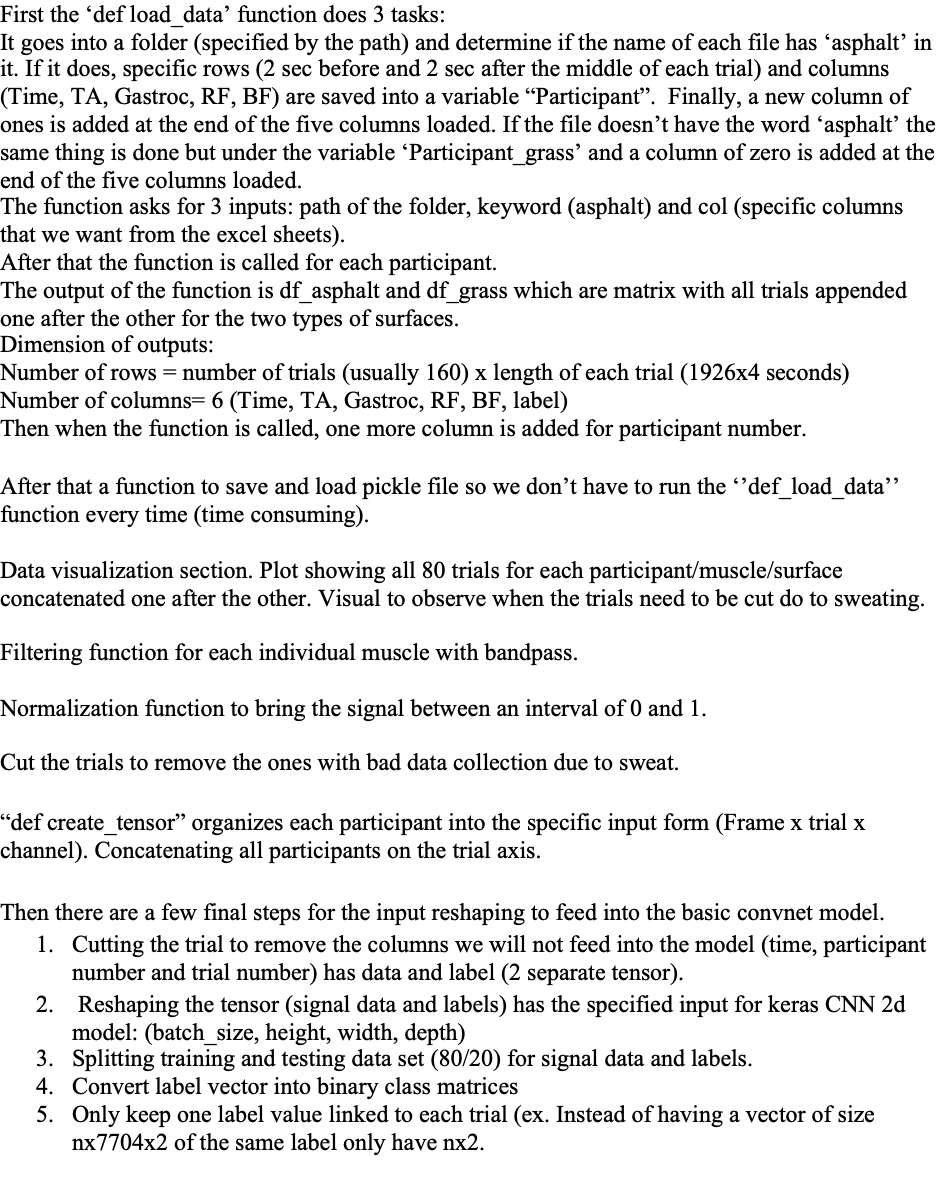

In [7]:
#import
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from scipy import signal
import torch

Connect to google drive content

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Participants from computer

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving exported-23.zip to exported-23.zip


#Prepare the data

Function to load data, organize it by surface and add a specifique label depending on the name of the excel file

In [5]:
def load_data(path,keyword,col):

  Window=1926*2 
  df_asphalt = pd.DataFrame()
  df_grass = pd.DataFrame()
  for fname in os.listdir(path):
    if keyword in fname: 
      os.chdir(path)
      pd_xl_file = pd.ExcelFile(fname)
      df = pd_xl_file.parse("Sheet1") 
      dimensions = df.shape
      Middle=int(dimensions[0]/2)
      Participant=pd.read_excel(fname,sheet_name='Sheet1',  usecols = col)
      Participant['label'] = pd.DataFrame(np.ones(dimensions[0]),dtype=int)
      Participant=Participant.iloc[Middle-Window:Middle+Window]
      df_asphalt = df_asphalt.append(Participant)
      

    else:
      os.chdir(path)
      pd_xl_file_grass = pd.ExcelFile(fname)
      df2 = pd_xl_file_grass.parse("Sheet1") 
      dimensions_grass = df2.shape
      Middle_grass=int(dimensions_grass[0]/2)
      Participant_grass=pd.read_excel(fname,sheet_name='Sheet1', usecols = col)
      Participant_grass['label'] = pd.DataFrame(np.zeros(dimensions_grass[0]),dtype=int)
      Participant_grass=Participant_grass.iloc[Middle_grass-Window:Middle_grass+Window]
      df_grass = df_grass.append(Participant_grass)
      
  return df_asphalt, df_grass

Unzip file and remove the bad files created (._)

In [ ]:
#only do once
# !unzip "/content/drive/MyDrive/Gab/Participants/P20/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P20"
# !unzip "/content/drive/MyDrive/Gab/Participants/P24/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P24"
#only do once (2,4,8,10,11,12)
# !unzip "/content/drive/MyDrive/Gab/Participants/P02/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P02"
# !unzip "/content/drive/MyDrive/Gab/Participants/P04/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P04"
# !unzip "/content/drive/MyDrive/Gab/Participants/P08/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P08"
# !unzip "/content/drive/MyDrive/Gab/Participants/P10/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P10"
# !unzip "/content/drive/MyDrive/Gab/Participants/P11/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P11"
# !unzip "/content/drive/MyDrive/Gab/Participants/P12/exported.zip" -d "/content/drive/MyDrive/Gab/Participants/P12"

# !unzip "/content/exported-13.zip" -d "/content/"
# !unzip "/content/exported-13/exported-14.zip" -d "/content/" 
# !unzip "/content/exported-14/exported-15.zip" -d "/content/" 
# !unzip "/content/exported-14/exported-15.zip" -d "/content/"
# !unzip "/content/exported-16/exported-17.zip" -d "/content/" 
# !unzip "/content/exported-17/exported-18.zip" -d "/content/"  
# !unzip "/content/exported-18/exported-19.zip" -d "/content/" 
# !unzip "/content/exported-19/exported-21.zip" -d "/content/"  
# !unzip "/content/exported-21/exported-22.zip" -d "/content/" 
!unzip "/content/exported-23.zip" -d "/content/" 

In [3]:
#remove files starting with ._
import os
import glob

files = glob.glob('/content/exported-23/._*')
for f in files:
    os.remove(f)

Call load function and add specific columns (participant and trial number)

In [ ]:
#P01
path1= '/content/drive/MyDrive/Gab/Participants/P01/exported-1/' 
df_asphalt_1, df_grass_1= load_data(path1,'sidewalk',"A,B,J,R,Z")
df_asphalt_1['participant_number']=1#add column for participant number
df_grass_1['participant_number']=1#add column for participant number

#P03
path3= '/content/drive/MyDrive/Gab/Participants/P03/exported-emg/'
df_asphalt_3, df_grass_3= load_data(path3,'asphalt',"A,B,D,L,T")
df_asphalt_3['participant_number']=3
df_grass_3['participant_number']=3

#P05
path5= '/content/drive/MyDrive/Gab/Participants/P05/exported-emg-5/'
df_asphalt_5, df_grass_5= load_data(path5,'asphalt',"A,B,D,L,T")
df_asphalt_5['participant_number']=5
df_grass_5['participant_number']=5

#P07
path7= '/content/drive/MyDrive/Gab/Participants/P07/exported-emg-7/'
df_asphalt_7, df_grass_7= load_data(path7,'asphalt',"A,B,D,L,T")
df_asphalt_7['participant_number']=7
df_grass_7['participant_number']=7

#P09
path9= '/content/drive/MyDrive/Gab/Participants/P09/exported-emg-9/'
df_asphalt_9, df_grass_9= load_data(path9,'asphalt',"A,B,D,L,T") 
df_asphalt_9['participant_number']=9
df_grass_9['participant_number']=9

#P20
path20= '/content/drive/MyDrive/Gab/Participants/P20/exported/'
df_asphalt_20, df_grass_20= load_data(path20,'asphalt',"A,B,D,L,T")
df_asphalt_20['participant_number']=20
df_grass_20['participant_number']=20

#P24
path24= '/content/drive/MyDrive/Gab/Participants/P24/exported/'
df_asphalt_24, df_grass_24= load_data(path24,'asphalt',"A,B,D,L,T") 
df_asphalt_24['participant_number']=24
df_grass_24['participant_number']=24

#P02
# path2= '/content/drive/MyDrive/Gab/Participants/P02/exported/'
# df_asphalt_2, df_grass_2= load_data(path2,'asphalt',"A,B,D,L,T")
# df_asphalt_2, df_grass_2= load_data(path2,'asphalt',"A,B,J,R,Z")
# df_asphalt_2['participant_number']=2
# df_grass_2['participant_number']=2

#P04
path4= '/content/drive/MyDrive/Gab/Participants/P04/exported/'
df_asphalt_4, df_grass_4= load_data(path4,'asphalt',"A,B,D,L,T") 
df_asphalt_4['participant_number']=4
df_grass_4['participant_number']=4

#P08
path8= '/content/drive/MyDrive/Gab/Participants/P08/exported/'
df_asphalt_8, df_grass_8= load_data(path8,'asphalt',"A,B,D,L,T")
df_asphalt_8['participant_number']=8
df_grass_8['participant_number']=8

#P10
path10= '/content/drive/MyDrive/Gab/Participants/P10/exported/'
df_asphalt_10, df_grass_10= load_data(path10,'asphalt',"A,B,D,L,T") 
df_asphalt_10['participant_number']=10
df_grass_10['participant_number']=10

#P11
path11= '/content/drive/MyDrive/Gab/Participants/P11/exported/'
df_asphalt_11, df_grass_11= load_data(path11,'asphalt',"A,B,D,L,T")
df_asphalt_11['participant_number']=11
df_grass_11['participant_number']=11

#P12
path12= '/content/drive/MyDrive/Gab/Participants/P12/exported/'
df_asphalt_12, df_grass_12= load_data(path12,'asphalt',"A,B,D,L,T") 
df_asphalt_12['participant_number']=12
df_grass_12['participant_number']=12

#P13
path13= '/content/exported-13'
df_asphalt_13, df_grass_13= load_data(path13,'asphalt',"A,B,D,L,T") 
df_asphalt_13['participant_number']=13
df_grass_13['participant_number']=13

#P14
path14= '/content/exported-14'
df_asphalt_14, df_grass_14= load_data(path14,'asphalt',"A,B,D,L,T") 
df_asphalt_14['participant_number']=14
df_grass_14['participant_number']=14

#P15
path15= '/content/exported-15'
df_asphalt_15, df_grass_15= load_data(path15,'asphalt',"A,B,D,L,T") 
df_asphalt_15['participant_number']=15
df_grass_15['participant_number']=15

#P16
path16= '/content/exported-16'
df_asphalt_16, df_grass_16= load_data(path16,'asphalt',"A,B,D,L,T") 
df_asphalt_16['participant_number']=16
df_grass_16['participant_number']=16

#P17
path17= '/content/exported-17'
df_asphalt_17, df_grass_17= load_data(path17,'asphalt',"A,B,D,L,T") 
df_asphalt_17['participant_number']=17
df_grass_17['participant_number']=17

#P18
path18= '/content/exported-18'
df_asphalt_18, df_grass_18= load_data(path18,'asphalt',"A,B,D,L,T") 
df_asphalt_18['participant_number']=18
df_grass_18['participant_number']=18

#P19
path19= '/content/exported-19'
df_asphalt_19, df_grass_19= load_data(path19,'asphalt',"A,B,D,L,T") 
df_asphalt_19['participant_number']=19
df_grass_19['participant_number']=19

#P21
path21= '/content/exported-21'
df_asphalt_21, df_grass_21= load_data(path21,'asphalt',"A,B,D,L,T") 
df_asphalt_21['participant_number']=21
df_grass_21['participant_number']=21

#P22
path22= '/content/exported-22'
df_asphalt_22, df_grass_22= load_data(path22,'asphalt',"A,B,D,L,T") 
df_asphalt_22['participant_number']=22
df_grass_22['participant_number']=22

In [ ]:
#P23
path23= '/content/exported-23'
df_asphalt_23, df_grass_23= load_data(path23,'asphalt',"A,B,D,L,T") 
df_asphalt_23['participant_number']=23
df_grass_23['participant_number']=23

Functions to save and open pickle files

In [ ]:
#only do once
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

In [ ]:
#save
f7_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle',df_grass_7)
f7_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle',df_asphalt_7)
f9_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle',df_grass_9)
f9_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle',df_asphalt_9)
f20_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_g.pickle',df_grass_20)
f20_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_a.pickle',df_asphalt_20)
f24_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_g.pickle',df_grass_24)
f24_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_a.pickle',df_asphalt_24)
# f2_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P02_g.pickle',df_grass_2)
# f2_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P02_a.pickle',df_asphalt_2)
f4_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P04_g.pickle',df_grass_4)
f4_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P04_a.pickle',df_asphalt_4)
f8_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P08_g.pickle',df_grass_8)
f8_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P08_a.pickle',df_asphalt_8)
f10_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P10_g.pickle',df_grass_10)
f10_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P10_a.pickle',df_asphalt_10)
f11_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P11_g.pickle',df_grass_11)
f11_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P11_a.pickle',df_asphalt_11)
f12_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P12_g.pickle',df_grass_12)
f12_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P12_a.pickle',df_asphalt_12)
f13_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P13_g.pickle',df_grass_13)
f13_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P13_a.pickle',df_asphalt_13)
f14_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P14_g.pickle',df_grass_14)
f14_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P14_a.pickle',df_asphalt_14)
f15_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P15_g.pickle',df_grass_15)
f15_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P15_a.pickle',df_asphalt_15)
f16_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P16_g.pickle',df_grass_16)
f16_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P16_a.pickle',df_asphalt_16)
f17_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P17_g.pickle',df_grass_17)
f17_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P17_a.pickle',df_asphalt_17)
f18_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P18_g.pickle',df_grass_18)
f18_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P18_a.pickle',df_asphalt_18)
f19_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P19_g.pickle',df_grass_19)
f19_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P19_a.pickle',df_asphalt_19)
f21_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P21_g.pickle',df_grass_21)
f21_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P21_a.pickle',df_asphalt_21)
f22_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P22_g.pickle',df_grass_22)
f22_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P22_a.pickle',df_asphalt_22)

In [ ]:
f23_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P23_g.pickle',df_grass_23)
f23_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P23_a.pickle',df_asphalt_23)

In [ ]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

In [ ]:
#load
df_grass_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_g.pickle')
df_asphalt_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_a.pickle')
df_grass_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_g.pickle')
df_asphalt_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_a.pickle')
df_grass_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle')
df_asphalt_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle')
df_grass_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle')
df_asphalt_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle')
df_grass_20= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_g.pickle')
df_asphalt_20= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P20_a.pickle')
df_grass_24= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_g.pickle')
df_asphalt_24= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P24_a.pickle')
# df_grass_2= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P02_g.pickle')
# df_asphalt_2= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P02_a.pickle')
df_grass_4= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P04_g.pickle')
df_asphalt_4= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P04_a.pickle')
df_grass_8= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P08_g.pickle')
df_asphalt_8= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P08_a.pickle')
df_grass_10= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P10_g.pickle')
df_asphalt_10= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P10_a.pickle')
df_grass_11= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P11_g.pickle')
df_asphalt_11= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P11_a.pickle')
df_grass_12= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P12_g.pickle')
df_asphalt_12= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P12_a.pickle')

Data visualization

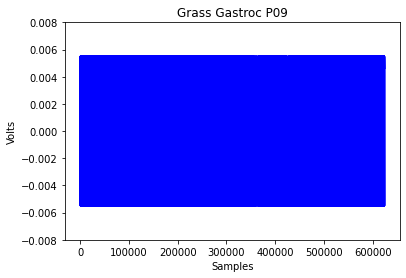

In [ ]:
#visualization of data grass
df_grass=df_asphalt_24
len_grass= list(range(0,len(df_grass.iloc[:,0])))
plt.plot(len_grass,df_grass.iloc[:,2],'b') 
plt.ylim((-0.008,0.008))
plt.title('Grass Gastroc P09') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

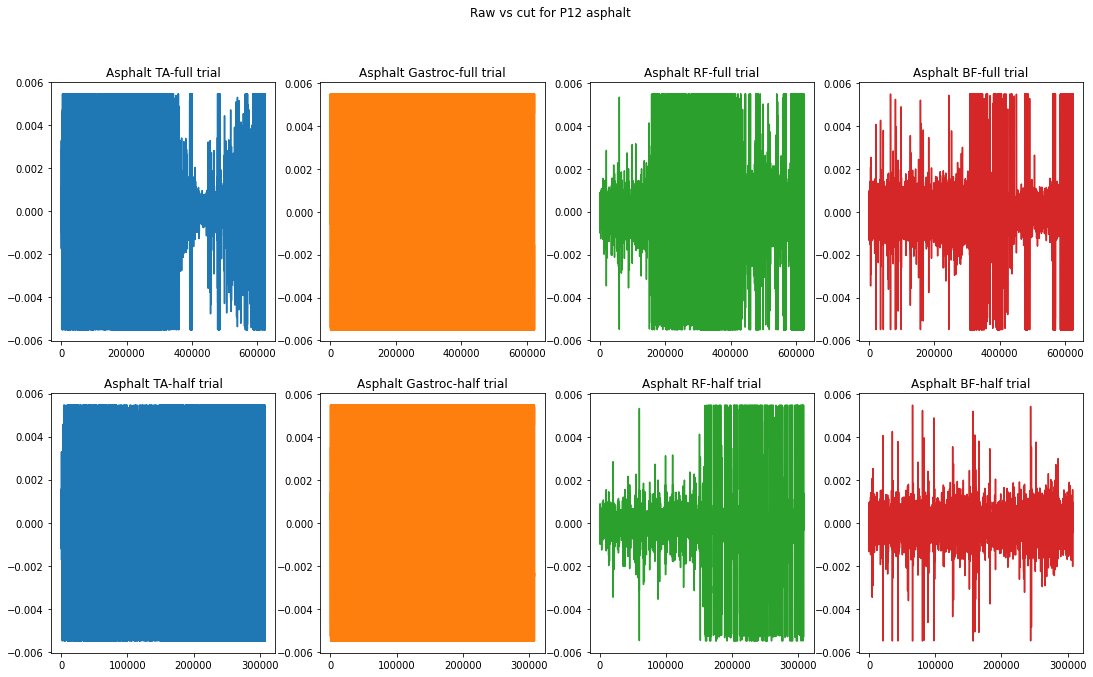

In [ ]:
import matplotlib.pyplot as plt
df_asphalt=df_asphalt_24
fig, ((ax1, ax2, ax3, ax4), (ax1_cut, ax2_cut, ax3_cut, ax4_cut)) = plt.subplots(2, 4)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Raw vs cut for P12 asphalt')

ax1.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,1])
ax1.title.set_text('Asphalt TA-full trial') 
ax1.locator_params(axis='x', nbins=4) 
ax2.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,2], 'tab:orange')
ax2.title.set_text('Asphalt Gastroc-full trial') 
ax2.locator_params(axis='x', nbins=4) 
ax3.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,3], 'tab:green')
ax3.title.set_text('Asphalt RF-full trial') 
ax3.locator_params(axis='x', nbins=4) 
ax4.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,4], 'tab:red')
ax4.title.set_text('Asphalt BF-full trial') 
ax4.locator_params(axis='x', nbins=4) 

ax1_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,1])
ax1_cut.title.set_text('Asphalt TA-half trial')
ax1_cut.locator_params(axis='x', nbins=4) 
ax2_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,2], 'tab:orange')
ax2_cut.title.set_text('Asphalt Gastroc-half trial')
ax2_cut.locator_params(axis='x', nbins=4) 
ax3_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,3], 'tab:green')
ax3_cut.title.set_text('Asphalt RF-half trial')
ax3_cut.locator_params(axis='x', nbins=4) 
ax4_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,4], 'tab:red')
ax4_cut.title.set_text('Asphalt BF-half trial') 
ax4_cut.locator_params(axis='x', nbins=4) 


Filtering EMG signals with banpass

In [ ]:
def filteremg(emg, Fs=1926, high_band=20, low_band=500):
    #variables
    time=emg.iloc[:,0]
    TA=emg.iloc[:,1]
    Gastroc=emg.iloc[:,2]
    RF=emg.iloc[:,3]
    BF=emg.iloc[:,4]
  
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(Fs/2)
    low_band = low_band/(Fs/2)
    
    # create bandpass filter for EMG
    b1, a1 = signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filt_TA = signal.filtfilt(b1, a1, TA)
    emg_filt_Gastroc= signal.filtfilt(b1, a1, Gastroc) 
    emg_filt_RF = signal.filtfilt(b1, a1, RF) 
    emg_filt_BF = signal.filtfilt(b1, a1, BF)

    #label and participant number
    label=np.transpose([emg.iloc[:,5]])
    Part_number=np.transpose([emg.iloc[:,6]])    

    return emg_filt_TA,emg_filt_Gastroc,emg_filt_RF,emg_filt_BF,label,Part_number

In [ ]:
#call function filtering
df_grass_3_filt=filteremg(emg=df_grass_3, Fs=1926, high_band=20, low_band=500)
df_asphalt_3_filt=filteremg(emg=df_asphalt_3, Fs=1926, high_band=20, low_band=500)

df_grass_5_filt=filteremg(emg=df_grass_5, Fs=1926, high_band=20, low_band=500)
df_asphalt_5_filt=filteremg(emg=df_asphalt_5, Fs=1926, high_band=20, low_band=500)

df_grass_7_filt=filteremg(emg=df_grass_7, Fs=1926, high_band=20, low_band=500)
df_asphalt_7_filt=filteremg(emg=df_asphalt_7, Fs=1926, high_band=20, low_band=500)

df_grass_9_filt=filteremg(emg=df_grass_9, Fs=1926, high_band=20, low_band=500)
df_asphalt_9_filt=filteremg(emg=df_asphalt_9, Fs=1926, high_band=20, low_band=500)

df_grass_20_filt=filteremg(emg=df_grass_20, Fs=1926, high_band=20, low_band=500)
df_asphalt_20_filt=filteremg(emg=df_asphalt_20, Fs=1926, high_band=20, low_band=500)

df_grass_24_filt=filteremg(emg=df_grass_24, Fs=1926, high_band=20, low_band=500)
df_asphalt_24_filt=filteremg(emg=df_asphalt_24, Fs=1926, high_band=20, low_band=500)

# df_grass_2_filt=filteremg(emg=df_grass_2, Fs=1926, high_band=20, low_band=500)
# df_asphalt_2_filt=filteremg(emg=df_asphalt_2, Fs=1926, high_band=20, low_band=500)

df_grass_4_filt=filteremg(emg=df_grass_4, Fs=1926, high_band=20, low_band=500)
df_asphalt_4_filt=filteremg(emg=df_asphalt_4, Fs=1926, high_band=20, low_band=500)

df_grass_8_filt=filteremg(emg=df_grass_8, Fs=1926, high_band=20, low_band=500)
df_asphalt_8_filt=filteremg(emg=df_asphalt_8, Fs=1926, high_band=20, low_band=500)

df_grass_10_filt=filteremg(emg=df_grass_10, Fs=1926, high_band=20, low_band=500)
df_asphalt_10_filt=filteremg(emg=df_asphalt_10, Fs=1926, high_band=20, low_band=500)

df_grass_11_filt=filteremg(emg=df_grass_11, Fs=1926, high_band=20, low_band=500)
df_asphalt_11_filt=filteremg(emg=df_asphalt_11, Fs=1926, high_band=20, low_band=500)

df_grass_12_filt=filteremg(emg=df_grass_12, Fs=1926, high_band=20, low_band=500)
df_asphalt_12_filt=filteremg(emg=df_asphalt_12, Fs=1926, high_band=20, low_band=500)

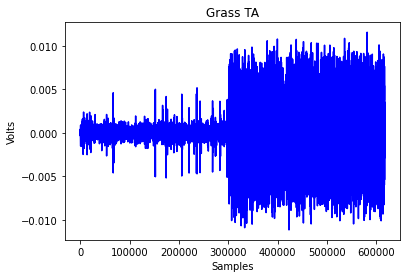

In [ ]:
#visualization of data filtered 
df_grass=df_grass_24_filt[3]
len_grass= list(range(0,len(df_grass)))
plt.plot(len_grass,df_grass,'b') 
plt.title('Grass TA') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

Normalize data to be betwen 0 and 1

In [ ]:
import numpy as np
def normalize(x):
  #Normalized Data
  TA_norm = (x[0]-min(x[0]))/(max(x[0])-min(x[0]))
  Gastroc_norm = (x[1]-min(x[1]))/(max(x[1])-min(x[1]))
  RF_norm = (x[2]-min(x[2]))/(max(x[2])-min(x[2]))
  BF_norm = (x[3]-min(x[3]))/(max(x[3])-min(x[3]))
  
  #label and participant number
  label=x[4]
  Part_number=x[5]
  return TA_norm,Gastroc_norm,RF_norm,BF_norm,label,Part_number

In [ ]:
#call filtering function
df_grass_3_norm=normalize(df_grass_3_filt)
df_asphalt_3_norm=normalize(df_asphalt_3_filt)
df_grass_5_norm=normalize(df_grass_5_filt)
df_asphalt_5_norm=normalize(df_asphalt_5_filt)
df_grass_7_norm=normalize(df_grass_7_filt)
df_asphalt_7_norm=normalize(df_asphalt_7_filt)
df_grass_9_norm=normalize(df_grass_9_filt)
df_asphalt_9_norm=normalize(df_asphalt_9_filt)
df_grass_20_norm=normalize(df_grass_20_filt)
df_asphalt_20_norm=normalize(df_asphalt_20_filt)
df_grass_24_norm=normalize(df_grass_24_filt)
df_asphalt_24_norm=normalize(df_asphalt_24_filt)
##
# df_grass_2_norm=normalize(df_grass_2_filt)
# df_asphalt_2_norm=normalize(df_asphalt_2_filt)
df_grass_4_norm=normalize(df_grass_4_filt)
df_asphalt_4_norm=normalize(df_asphalt_4_filt)
df_grass_8_norm=normalize(df_grass_8_filt)
df_asphalt_8_norm=normalize(df_asphalt_8_filt)
df_grass_10_norm=normalize(df_grass_10_filt)
df_asphalt_10_norm=normalize(df_asphalt_10_filt)
df_grass_11_norm=normalize(df_grass_11_filt)
df_asphalt_11_norm=normalize(df_asphalt_11_filt)
df_grass_12_norm=normalize(df_grass_12_filt)
df_asphalt_12_norm=normalize(df_asphalt_12_filt)

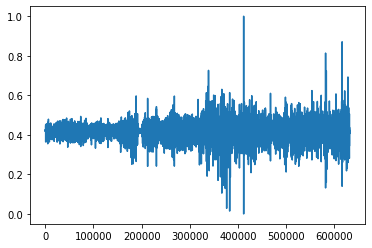

In [ ]:
plt.plot(df_asphalt_20_norm[2])
plt.show()

In [ ]:
df_grass_3_norm=(pd.DataFrame(df_grass_3_norm)).T
df_asphalt_3_norm=(pd.DataFrame(df_asphalt_3_norm)).T
df_grass_5_norm=(pd.DataFrame(df_grass_5_norm)).T
df_asphalt_5_norm=(pd.DataFrame(df_asphalt_5_norm)).T
df_grass_7_norm=(pd.DataFrame(df_grass_7_norm)).T
df_asphalt_7_norm=(pd.DataFrame(df_asphalt_7_norm)).T
df_grass_9_norm=(pd.DataFrame(df_grass_9_norm)).T
df_asphalt_9_norm=(pd.DataFrame(df_asphalt_9_norm)).T
df_grass_20_norm=(pd.DataFrame(df_grass_20_norm)).T
df_asphalt_20_norm=(pd.DataFrame(df_asphalt_20_norm)).T
df_grass_24_norm=(pd.DataFrame(df_grass_24_norm)).T
df_asphalt_24_norm=(pd.DataFrame(df_asphalt_24_norm)).T

#
# df_grass_2_norm=(pd.DataFrame(df_grass_2_norm)).T
# df_asphalt_2_norm=(pd.DataFrame(df_asphalt_2_norm)).T
df_grass_4_norm=(pd.DataFrame(df_grass_4_norm)).T
df_asphalt_4_norm=(pd.DataFrame(df_asphalt_4_norm)).T
df_grass_8_norm=(pd.DataFrame(df_grass_8_norm)).T
df_asphalt_8_norm=(pd.DataFrame(df_asphalt_8_norm)).T
df_grass_10_norm=(pd.DataFrame(df_grass_10_norm)).T
df_asphalt_10_norm=(pd.DataFrame(df_asphalt_10_norm)).T
df_grass_11_norm=(pd.DataFrame(df_grass_11_norm)).T
df_asphalt_11_norm=(pd.DataFrame(df_asphalt_11_norm)).T
df_grass_12_norm=(pd.DataFrame(df_grass_12_norm)).T
df_asphalt_12_norm=(pd.DataFrame(df_asphalt_12_norm)).T

In [ ]:
#Remove trials affected by sweat based on excel sheet
df_grass_3_norm_TA=df_grass_3_norm [0:308160,1] 

KeyError: ignored

Creating a tensor with specific shape (frame x trial x channel)

In [ ]:
def create_tensor(df_a,df_g):
  #tensor asphalt 
  trials_a=len(df_a)/(1926*4) # how many trials-80
  T_asphalt=np.stack(np.split(df_a.values, trials_a), axis=1)
  #tensor grass
  trials_g=len(df_g)/(1926*4) # how many trials
  T_grass=np.stack(np.split(df_g.values, trials_g), axis=1)
  #tensor both conditions
  a=tf.constant(T_asphalt.astype('float32'))
  g=tf.constant(T_grass.astype('float32'))
  T = tf.concat([a, g], axis=1)

  return T

In [ ]:
# T1=create_tensor(df_asphalt_1,df_grass_1)
# print("T1 shape:", T1.shape)

T3=create_tensor(df_asphalt_3_norm,df_grass_3_norm)
print("T3 shape:", T3.shape)

T5=create_tensor(df_asphalt_5_norm,df_grass_5_norm)
print("T5 shape:", T5.shape)

T7=create_tensor(df_asphalt_7_norm,df_grass_7_norm)
print("T7 shape:", T7.shape)

T9=create_tensor(df_asphalt_9_norm,df_grass_9_norm)
print("T9 shape:", T9.shape)

T20=create_tensor(df_asphalt_20_norm,df_grass_20_norm)
print("T20 shape:", T20.shape)

T24=create_tensor(df_asphalt_24_norm,df_grass_24_norm)
print("T24 shape:", T24.shape)

##
# T2=create_tensor(df_asphalt_2_norm,df_grass_2_norm)
# print("T2 shape:", T2.shape)

T4=create_tensor(df_asphalt_4_norm,df_grass_4_norm)
print("T4 shape:", T4.shape)

T8=create_tensor(df_asphalt_8_norm,df_grass_8_norm)
print("T8 shape:", T8.shape)#

T10=create_tensor(df_asphalt_10_norm,df_grass_10_norm)
print("T10 shape:", T10.shape)

T11=create_tensor(df_asphalt_11_norm,df_grass_11_norm)
print("T11 shape:", T11.shape)

T12=create_tensor(df_asphalt_12_norm,df_grass_12_norm)
print("T12 shape:", T12.shape)#


TT = tf.concat([T3,T5,T7,T9,T20,T24,T4,T8,T10,T11,T12], axis=1)
print("Tensor_all shape:", TT.shape)

T3 shape: (7704, 160, 6)
T5 shape: (7704, 160, 6)
T7 shape: (7704, 161, 6)
T9 shape: (7704, 160, 6)
T20 shape: (7704, 135, 6)
T24 shape: (7704, 161, 6)
T4 shape: (7704, 132, 6)
T8 shape: (7704, 161, 6)
T10 shape: (7704, 160, 6)
T11 shape: (7704, 160, 6)
T12 shape: (7704, 160, 6)
Tensor_all shape: (7704, 1710, 6)


In [ ]:
#Remove trials affected by sweat based on excel sheet
# T3_cut_TA=T3[:, 0:40, 1] 
# print("T3 TA shape:", T3_cut_TA.shape)
# T3_cut_Gas=T3[:, 0:40, 2] 
# print("T3 Gastroc shape:", T3_cut_Gas.shape)
# T3_cut_RF=T3[:, 0:40, 3] 
# print("T3 RF shape:", T3_cut_RF.shape)
# T3_cut_BF=T3[:, 0:40, 4] 
# print("T3 BF shape:", T3_cut_BF.shape)


In [ ]:
#save
TT=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/TT.pickle',TT)